# **ML Assignment 1: Medical Charges Predictions**

In [2]:
import pandas as pd

In [3]:
insurance_data = pd.read_csv('insurance.csv') #Import the dataset

In [14]:
import pandas as pd

# Load the dataset
dataset_path = 'insurance.csv'
data = pd.read_csv(dataset_path)

# Displaying basic information about the dataset
data_info = data.info()
data_description = data.describe(include='all')

# Displaying the first few rows of the dataset for a quick overview
data_head = data.head()

data_info, data_description, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(None,
                 age   sex          bmi     children smoker     region  \
 count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
 unique          NaN     2          NaN          NaN      2          4   
 top             NaN  male          NaN          NaN     no  southeast   
 freq            NaN   676          NaN          NaN   1064        364   
 mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
 std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
 min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
 25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
 50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
 75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
 max       64.000000   NaN    53.130000     5.000000    NaN        NaN   
 
              charges  
 count    1338.000000  
 unique           NaN  
 top              NaN  
 freq  

In [15]:
df=insurance_data.isnull().sum()
df

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values in the data set, now lets check the duplicates

### Checking for duplicates

In [16]:
# Checking for duplicates
duplicates = insurance_data.duplicated().sum()

# Dropping duplicates if any
if duplicates > 0:
    insurance_data_cleaned = insurance_data.drop_duplicates()
else:
    insurance_data_cleaned = insurance_data

duplicates, insurance_data_cleaned.shape


(1, (1337, 7))

Duplicate was found and removed from the dataset

### Encoding

In [17]:
# Binary encoding for 'sex' and 'smoker'
insurance_data_cleaned['sex'] = insurance_data_cleaned['sex'].map({'female': 0, 'male': 1})
insurance_data_cleaned['smoker'] = insurance_data_cleaned['smoker'].map({'no': 0, 'yes': 1})

# One-hot encoding for 'region'
region_encoded = pd.get_dummies(insurance_data_cleaned['region'], prefix='region')
insurance_data_encoded = pd.concat([insurance_data_cleaned, region_encoded], axis=1).drop('region', axis=1)

# Displaying the first few rows of the modified dataframe
insurance_data_encoded.head()


C:\Users\Hp\AppData\Local\Temp\ipykernel_18624\942842447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_data_cleaned['sex'] = insurance_data_cleaned['sex'].map({'female': 0, 'male': 1})
C:\Users\Hp\AppData\Local\Temp\ipykernel_18624\942842447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_data_cleaned['smoker'] = insurance_data_cleaned['smoker'].map({'no': 0, 'yes': 1})


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


The encoding of the categorical variables in the insurance dataset has been completed as follows:<br>
- **Sex:** Binary encoded. 'female' is represented as 0 and 'male' as 1.<br>
- **Smoker:** Binary encoded. 'no' is represented as 0 and 'yes' as 1.<br>
- **Region:** One-hot encoded. This has created four new columns:<br>
  - region_northeast
  - region_northwest
  - region_southeast
  - region_southwest<br>

Each column represents a region, with a 1 indicating the presence of that region for a record and 0 otherwise.
</span>

In [18]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns for standardization
numerical_cols = ['age', 'bmi', 'charges']
scaler = StandardScaler()

# Standardizing the numerical columns
insurance_data_encoded[numerical_cols] = scaler.fit_transform(insurance_data_encoded[numerical_cols])

# Displaying the first few rows of the modified dataframe
insurance_data_encoded.head()


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.440418,0,-0.453160,0,1,0.297857,False,False,False,True
1,-1.511647,1,0.509422,1,0,-0.954381,False,False,True,False
2,-0.799350,1,0.383155,3,0,-0.729373,False,False,True,False
3,-0.443201,1,-1.305052,0,0,0.719104,False,True,False,False
4,-0.514431,1,-0.292456,0,0,-0.777499,False,True,False,False


### Standardization

In [19]:
from sklearn.preprocessing import StandardScaler

# Selecting only the numerical features for standardization
numerical_features = insurance_data_encoded[['age', 'bmi', 'children', 'charges']]

# Applying standardization
scaler = StandardScaler()
insurance_data_encoded[['age', 'bmi', 'children', 'charges']] = scaler.fit_transform(numerical_features)

# Displaying the first few rows of the standardized dataset
insurance_data_encoded.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.440418,0,-0.453160,-0.909234,1,0.297857,False,False,False,True
1,-1.511647,1,0.509422,-0.079442,0,-0.954381,False,False,True,False
2,-0.799350,1,0.383155,1.580143,0,-0.729373,False,False,True,False
3,-0.443201,1,-1.305052,-0.909234,0,0.719104,False,True,False,False
4,-0.514431,1,-0.292456,-0.909234,0,-0.777499,False,True,False,False


The numerical features in the dataset (age, BMI, children, and charges) have been standardized. This standardization process has transformed these features to have a mean of 0 and a standard deviation of 1

### Exploratory Data Analysis (EDA)

Analyze the Distribution of Key Variables

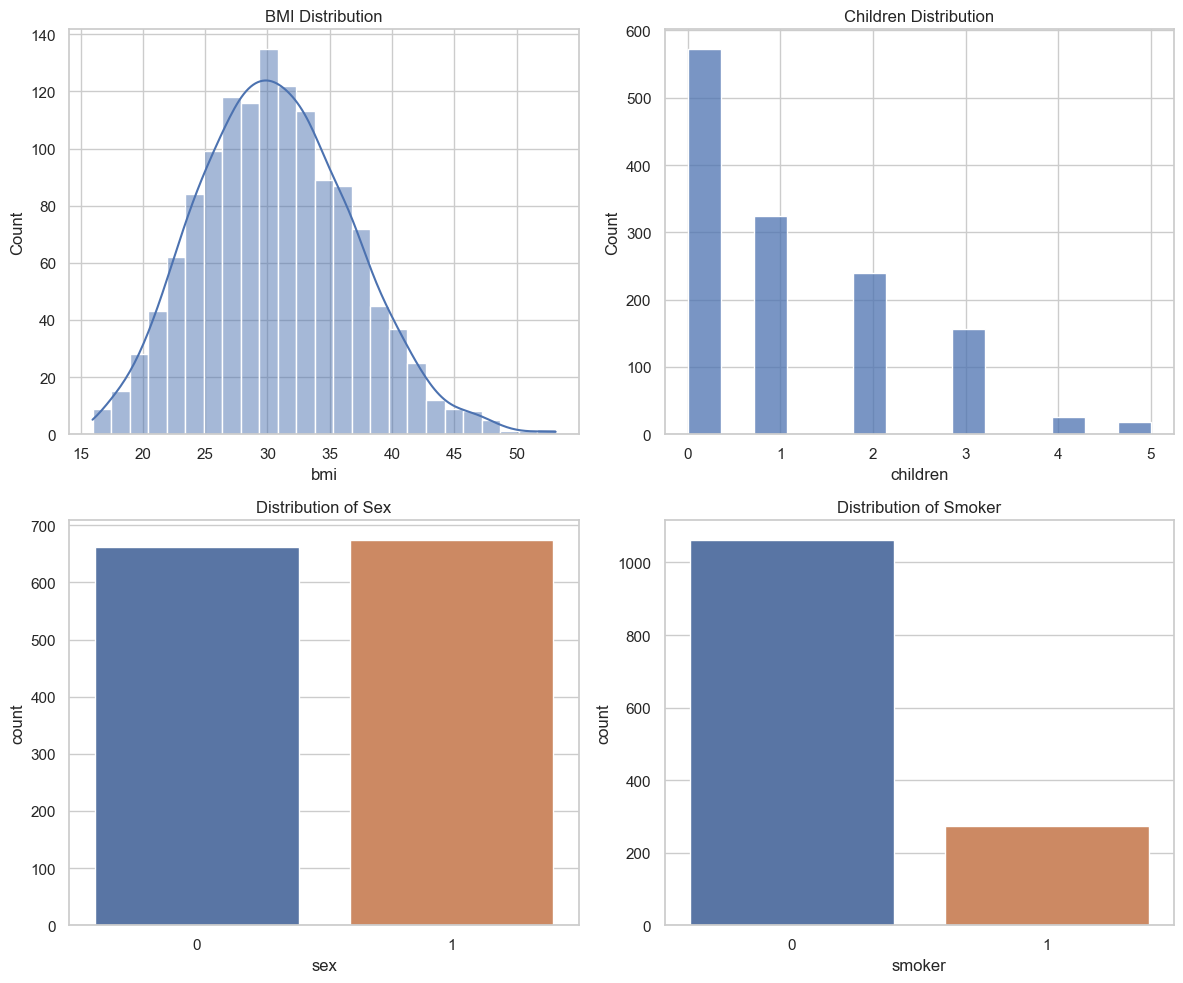

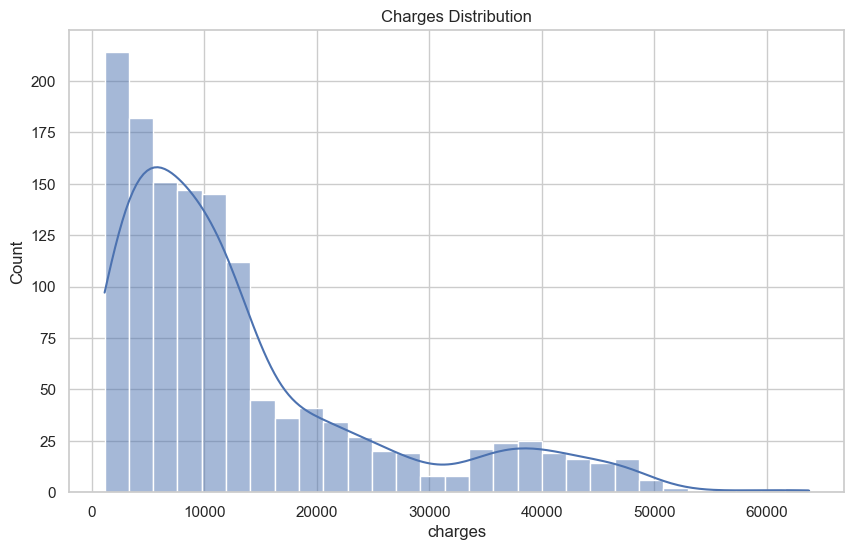

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating subplots for better clarity
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# BMI distribution
sns.histplot(insurance_data_cleaned['bmi'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('BMI Distribution')

# Children distribution
sns.histplot(insurance_data_cleaned['children'], kde=False, ax=axes[0, 1])
axes[0, 1].set_title('Children Distribution')

# Distribution of Sex
sns.countplot(x='sex', data=insurance_data_cleaned, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Sex')

# Distribution of Smoker
sns.countplot(x='smoker', data=insurance_data_cleaned, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Smoker')

# Adjusting layout for better spacing
plt.tight_layout()
plt.show()

# Charges distribution
plt.figure(figsize=(10, 6))
sns.histplot(insurance_data_cleaned['charges'], kde=True)
plt.title('Charges Distribution')
plt.show()


1. ### BMI Distribution
   
    The first subplot shows the distribution of BMI (Body Mass Index).
    The x-axis represents the BMI values, and the y-axis represents the frequency of occurrences.
    The curve overlaid on the histogram is the Kernel Density Estimate (KDE), providing a smooth representation of the distribution.

2. ### Children Distribution
   
    The second subplot displays the distribution of the number of children.
    The x-axis represents the count of children, and the y-axis represents the frequency.
    Since the count is a discrete variable, a histogram without KDE is used.

3. ### Distribution of Sex
    
    The third subplot is a countplot showing the distribution of individuals based on their gender (male or female).
    The x-axis represents the gender categories ('male' and 'female'), and the y-axis represents the count of individuals in each category.

4. ### Distribution of Smoker
    
    The fourth subplot is a countplot illustrating the distribution of individuals based on their smoking status ('smoker' or 'non-smoker').
    The x-axis represents the smoking categories, and the y-axis represents the count of individuals in each category.

5. ### Charges Distribution
    
    The fifth plot is a histogram showing the distribution of insurance charges.
    The x-axis represents the charges, and the y-axis represents the frequency of occurrences.
    The KDE provides a smooth estimate of the probability density function of the charges.

### **Relationships between features and the target variable (charges)**

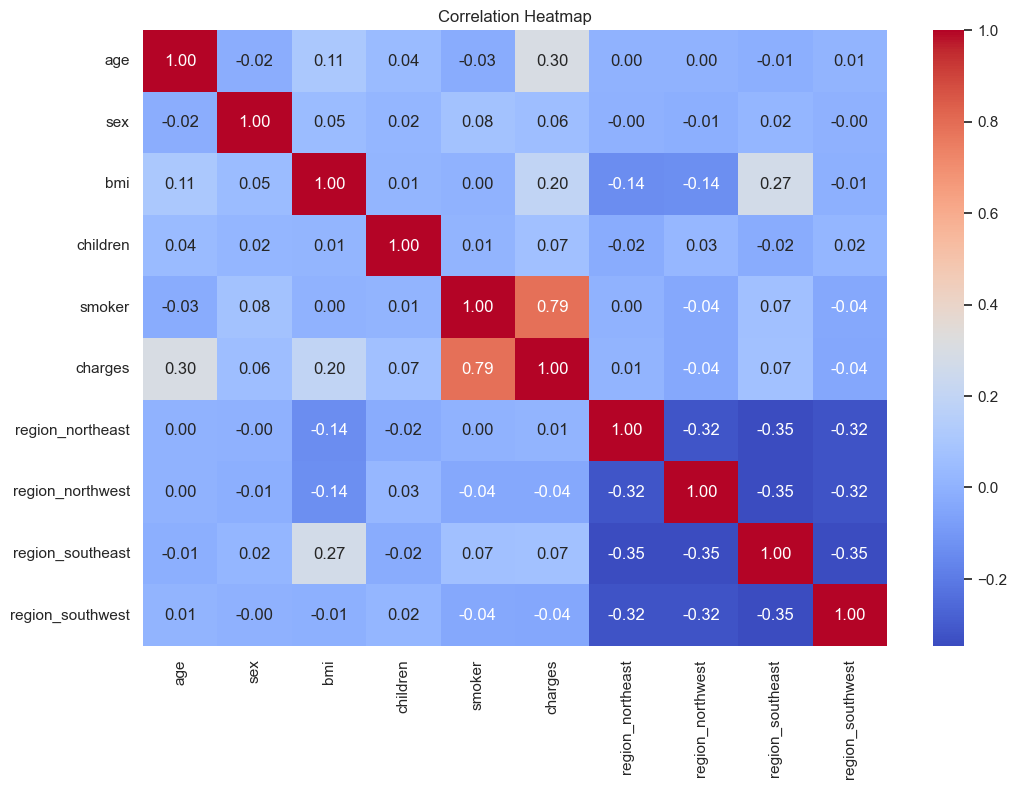

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating the correlation matrix
correlation_matrix = insurance_data_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


   
**Age**: There is a positive correlation with 'charges', indicated by a coefficient above 0. This suggests that as age increases, insurance charges tend to increase as well.

**Sex**: The correlation coefficient is relatively low, suggesting a weak relationship between the gender of the individual and the insurance charges.

**BMI (Body Mass Index)**: This feature shows a positive correlation with 'charges'. A higher BMI is associated with higher insurance charges, which might reflect the increased health risks associated with higher BMI.

**Children**: The correlation with 'charges' is positive but weak. This indicates that having more children might slightly increase insurance charges, but the effect is not very strong.

**Smoker**: This shows a strong positive correlation with 'charges'. Being a smoker is significantly associated with higher insurance charges, which is likely due to the increased health risks linked to smoking.

**Region**: The correlation coefficients for the different regions (northeast, northwest, southeast, southwest) are all relatively low. This suggests that the region of the policyholder has a minimal direct impact on the insurance charges.



### **Identify potential outliers or influential points.**

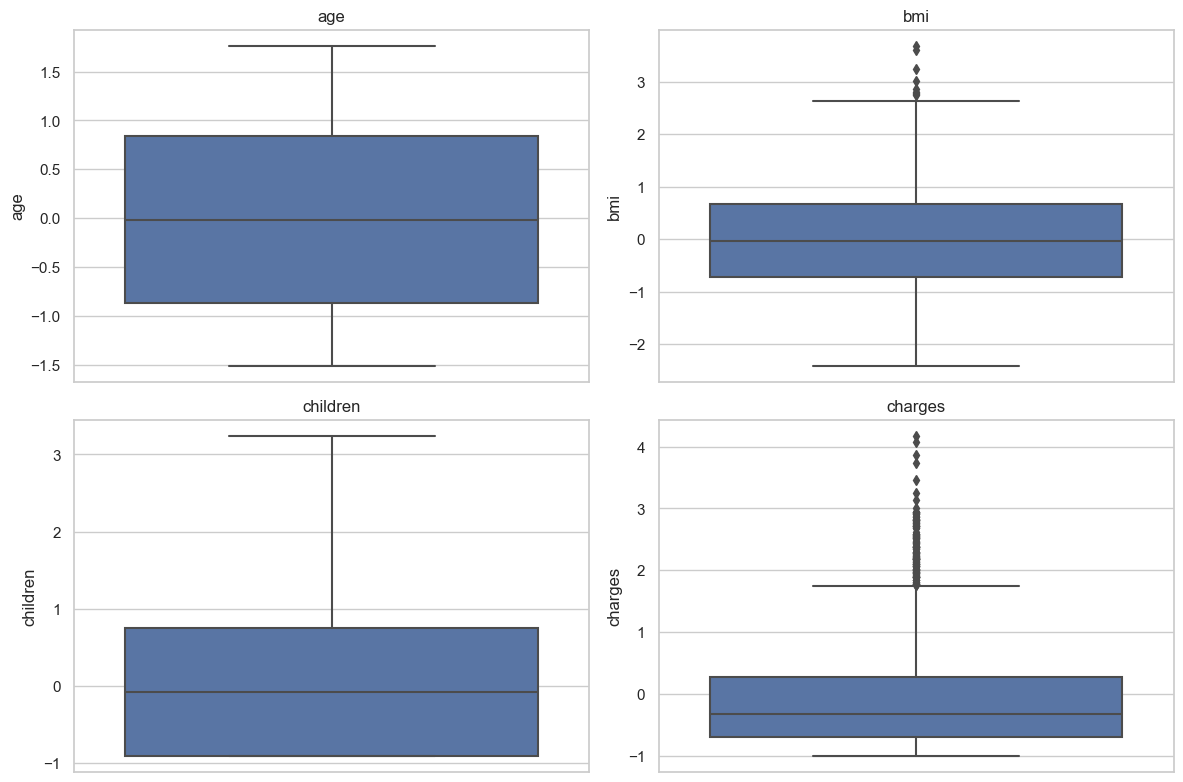

In [22]:
# Creating boxplots only for relevant numeric variables
relevant_columns = ['age', 'bmi', 'children', 'charges']

plt.figure(figsize=(12, 8))

# Creating a boxplot for each relevant column
for i, column in enumerate(relevant_columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=insurance_data_encoded[column])
    plt.title(column)

plt.tight_layout()
plt.show()


From the boxplot of 'bmi', we can observe some points that appear to be outside the typical range, indicating potential outliers. We will now proceed to remove these outliers from the 'bmi' variable

In [23]:
# Repeating the outlier removal process for 'bmi'
# Calculating IQR for 'bmi'
Q1_bmi = insurance_data_encoded['bmi'].quantile(0.25)
Q3_bmi = insurance_data_encoded['bmi'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi

# Defining thresholds for outliers in 'bmi'
lower_bound_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_bound_bmi = Q3_bmi + 1.5 * IQR_bmi

# Filtering out the outliers from 'bmi'
insurance_data_no_outliers_bmi = insurance_data_encoded[(insurance_data_encoded['bmi'] >= lower_bound_bmi) & (insurance_data_encoded['bmi'] <= upper_bound_bmi)]

# Comparing the shapes of the original and the filtered datasets
original_shape_bmi = insurance_data_encoded.shape
filtered_shape_bmi = insurance_data_no_outliers_bmi.shape

original_shape_bmi, filtered_shape_bmi


((1337, 10), (1328, 10))

The outliers in the 'bmi' variable have been successfully removed. The original dataset contained 1337 entries, and after filtering out the outliers from 'bmi', the dataset now contains 1328 entries. This indicates that 9 entries identified as outliers in the 'bmi' variable were removed.

### **Model Development**

Since we are interested in predicting 'charges', it will be our target variable (y), and the rest of the columns will be our features (X)

In [24]:
from sklearn.model_selection import train_test_split

# Defining the features (X) and the target variable (y)
X = insurance_data_no_outliers_bmi.drop('charges', axis=1)
y = insurance_data_no_outliers_bmi['charges']

# Splitting the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Checking the sizes of the training and testing sets
training_set_size = X_train.shape[0]
testing_set_size = X_test.shape[0]

training_set_size, testing_set_size


(929, 399)

The dataset has been successfully split into training and testing sets. The training set contains 929 entries, and the testing set contains 399 entries, adhering to the 70% training and 30% testing split.

### Implement a linear regression model

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creating the linear regression model
lr_model = LinearRegression()

# Fitting the model to the training data
lr_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = lr_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse*100, r2*100


(24.044165186552664, 76.8386498448239)


The linear regression model has been successfully implemented and evaluated. Here are the key metrics from the evaluation on the test set:

Mean Squared Error (MSE): The MSE of the model on the test set is approximately **24.04%**. This metric measures the average of the squares of the errors, i.e., the average squared difference between the estimated values and the actual value. **A lower MSE indicates a better fit of the model to the data.**
    
R-squared (R²): The R² value is approximately **76.83%**. This metric represents the proportion of the variance for the dependent variable that's explained by the independent variables in the model. **An R² value closer to 1 indicates a model that explains a larger portion of the variance in the dependent variable.**

1. Interpret the coefficients of the linear regression model.
2. Discuss the impact of different features on medical charges.

In [29]:
# Extracting the coefficients and the intercept
coefficients = lr_model.coef_
intercept = lr_model.intercept_

# Creating a DataFrame to display feature names and their corresponding coefficients
feature_names = X.columns
coefficients_df = pd.DataFrame(data=coefficients, index=feature_names, columns=['Coefficient'])

# Displaying the coefficients and the intercept
coefficients_df, intercept


(                  Coefficient
 age                  0.297563
 sex                 -0.001172
 bmi                  0.172646
 children             0.057045
 smoker               1.924134
 region_northeast     0.059379
 region_northwest     0.035760
 region_southeast    -0.045403
 region_southwest    -0.049736,
 -0.39762053941065917)

**Intercept**: Approximately -0.398. This is the value of 'charges' when all other features are 0.

For the features:

**Age**: Coefficient = 0.298. This indicates that for each additional year of age, the medical charges increase by about 0.298 units, holding all other factors constant.

**Sex**: Coefficient = -0.001. This suggests a negligible effect of the sex on medical charges, with male having slightly lower charges compared to female, all else being equal.

**BMI**: Coefficient = 0.173. This shows that for each unit increase in BMI, the medical charges increase by about 0.173 units, assuming other factors remain constant.

**Children**: Coefficient = 0.057. For each additional child, the medical charges increase by about 0.057 units, other factors held constant.

**Smoker**: Coefficient = 1.924. Being a smoker is associated with an increase of about 1.924 units in medical charges, other factors being equal. This is a significant impact compared to other features.

**Region**: The coefficients for the regions (northeast, northwest, southeast, southwest) are 0.059, 0.036, -0.045, and -0.050, respectively. These coefficients suggest minor differences in medical charges based on region, with the northeast region having a slightly higher charge and the southwest having a slightly lower charge, compared to the baseline region (not explicitly shown in the model).

In summary, the most impactful features on medical charges appear to be 'smoker' status and 'age', with 'bmi' also having a notable effect. 'Sex' and 'region' have less pronounced impacts.

### **Advanced Analysis**

In [30]:
from sklearn.linear_model import Ridge, Lasso

# Creating and fitting the Ridge regression model
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge_model.fit(X_train, y_train)

# Predicting on the test set and evaluating the Ridge model
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Creating and fitting the Lasso regression model
lasso_model = Lasso(alpha=0.01)  # Alpha is the regularization strength
lasso_model.fit(X_train, y_train)

# Predicting on the test set and evaluating the Lasso model
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

mse_ridge, r2_ridge, mse_lasso, r2_lasso

(0.2408619749410458,
 0.7679816081201754,
 0.24137492294446522,
 0.767487493717516)

The Ridge and Lasso regression models have been implemented and evaluated. Here are their performance metrics compared to the original linear regression model:


**Ridge Regression:**

Mean Squared Error (MSE): ~0.2409
R-squared (R²): ~0.7680
Lasso Regression:

Mean Squared Error (MSE): ~0.2414
R-squared (R²): ~0.7675
For comparison, the original linear regression model had an MSE of ~0.2404 and an R² of ~0.7684.


**Interpretation:**


The performance of both Ridge and Lasso regression models is very similar to the original linear regression model in terms of MSE and R².
    

The slight differences in metrics indicate that these regularized models are not significantly better in this case. This might be due to the fact that the original model did not suffer much from overfitting, or the dataset is not complex enough to benefit substantially from regularization.
    

Regularization is more effective in scenarios with high feature count, significant multicollinearity, or when the model is overfitting. In this case, the benefits of regularization appear to be marginal.

In [31]:
import numpy as np

# Setting up the baseline input: mean values of the features
baseline_input = X_train.mean().to_numpy().reshape(1, -1)

# Varying each feature within its range (mean ± 1 standard deviation)
feature_impact = {}
for i, feature in enumerate(X_train.columns):
    # Creating two scenarios: mean - std and mean + std for each feature
    lower_input = baseline_input.copy()
    upper_input = baseline_input.copy()
    std_dev = X_train[feature].std()

    lower_input[0, i] -= std_dev
    upper_input[0, i] += std_dev

    # Predicting charges for both scenarios
    lower_pred = lr_model.predict(lower_input)
    upper_pred = lr_model.predict(upper_input)

    # Recording the change in prediction
    feature_impact[feature] = upper_pred - lower_pred

# Converting results to a more readable format
feature_impact_df = pd.DataFrame(feature_impact, index=["Change in Prediction"]).T
feature_impact_df.sort_values(by="Change in Prediction", ascending=False)


c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression wa

,Change in Prediction
smoker,1.546933
age,0.594402
bmi,0.337320
children,0.115985
region_northeast,0.049783
region_northwest,0.031107
sex,-0.001173
region_southeast,-0.040495
region_southwest,-0.042893


The results from the sensitivity analysis, showing the change in the prediction of medical charges as each feature varies by ±1 standard deviation from its mean, are as follows:


**Smoker:** The largest change in prediction, approximately 1.547 units. This indicates that the model is highly sensitive to the smoking status of the individual, suggesting that being a smoker significantly increases predicted medical charges.


    
**Age:** A change of about 0.594 units. The model is quite sensitive to age, indicating that older individuals are predicted to have higher medical charges.


    
**BMI:** A change of about 0.337 units. This suggests a moderate sensitivity to BMI, with higher BMI associated with higher predicted charges.


   
**Children:** A change of about 0.116 units. The model shows some sensitivity to the number of children, suggesting that having more children is associated with slightly higher medical charges.


    
**Region:** Changes range from approximately 0.031 to 0.050 units for different regions. The sensitivity to region is relatively low, indicating minor differences in predicted charges based on the region.

    
**Sex:** A very minimal change of about -0.0012 units. This implies that the model is not sensitive to the sex of the individual, suggesting a negligible impact on medical charges.